**Nama : M.Nizar Subakti**

**Nim : G.231.22.0116**

**Praktikum : 8**

Supervsed_Learning

Akurasi model: 1.00


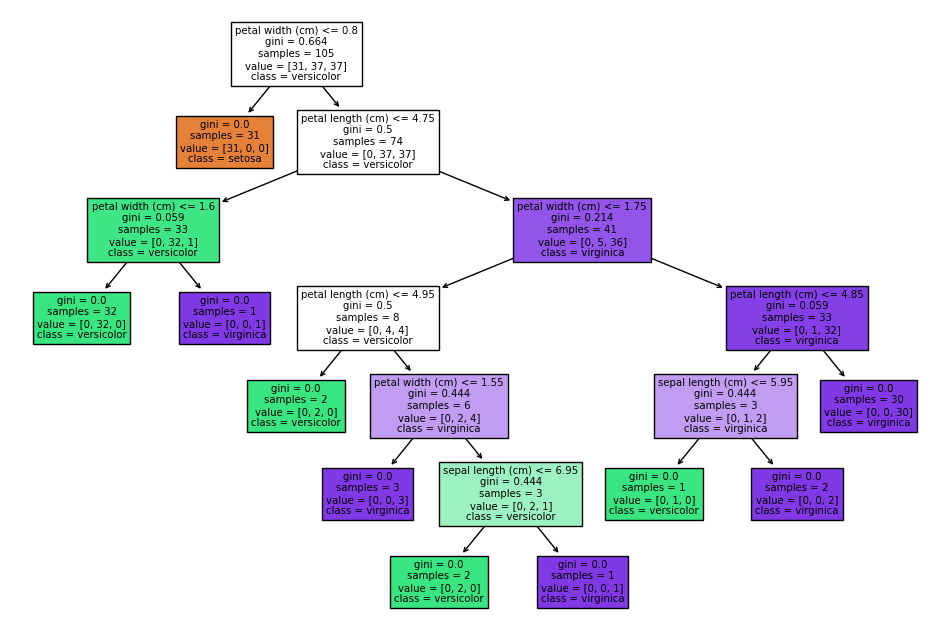

In [ ]:
# Import library yang diperlukan
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Memuat dataset iris
iris = load_iris()
X = iris.data  # Fitur
y = iris.target  # Label

# Membagi dataset menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat model Decision Tree
clf = DecisionTreeClassifier()

# Melatih model
clf.fit(X_train, y_train)

# Memprediksi hasil pada test set
y_pred = clf.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {accuracy:.2f}')

# Visualisasi Decision Tree (opsional)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


Unsupersaed_Learning

In [35]:
from __future__ import print_function, division
import string
import numpy as np

class GeneticAlgorithm():
    """An implementation of a Genetic Algorithm which will try to produce the user
    specified target string.

    Parameters:
    -----------
    target_string: string
        The string which the GA should try to produce.
    population_size: int
        The number of individuals (possible solutions) in the population.
    mutation_rate: float
        The rate (or probability) of which the alleles (chars in this case) should be
        randomly changed.
    """
    def __init__(self, target_string, population_size, mutation_rate):
        self.target = target_string
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.letters = [" "] + list(string.ascii_letters)

    def _initialize(self):
        """ Initialize population with random strings """
        self.population = []
        for _ in range(self.population_size):
            # Select random letters as new individual
            individual = "".join(np.random.choice(self.letters, size=len(self.target)))
            self.population.append(individual)

    def _calculate_fitness(self):
        """ Calculates the fitness of each individual in the population """
        population_fitness = []
        for individual in self.population:
            # Calculate loss as the alphabetical distance between
            # the characters in the individual and the target string
            loss = 0
            for i in range(len(individual)):
                letter_i1 = self.letters.index(individual[i])
                letter_i2 = self.letters.index(self.target[i])
                loss += abs(letter_i1 - letter_i2)
            fitness = 1 / (loss + 1e-6)
            population_fitness.append(fitness)
        return population_fitness

    def _mutate(self, individual):
        """ Randomly change the individual's characters with probability
        self.mutation_rate """
        individual = list(individual)
        for j in range(len(individual)):
            # Make change with probability mutation_rate
            if np.random.random() < self.mutation_rate:
                individual[j] = np.random.choice(self.letters)
        # Return mutated individual as string
        return "".join(individual)

    def _crossover(self, parent1, parent2):
        """ Create children from parents by crossover """
        # Select random crossover point
        cross_i = np.random.randint(0, len(parent1))
        child1 = parent1[:cross_i] + parent2[cross_i:]
        child2 = parent2[:cross_i] + parent1[cross_i:]
        return child1, child2

    def run(self, iterations):
        # Initialize new population
        self._initialize()

        for epoch in range(iterations):
            population_fitness = self._calculate_fitness()

            fittest_individual = self.population[np.argmax(population_fitness)]
            highest_fitness = max(population_fitness)

            # If we have found individual which matches the target => Done
            if fittest_individual == self.target:
                break

            # Set the probability that the individual should be selected as a parent
            # proportionate to the individual's fitness.
            parent_probabilities = [fitness / sum(population_fitness) for fitness in population_fitness]

            # Determine the next generation
            new_population = []
            for i in np.arange(0, self.population_size, 2):
                # Select two parents randomly according to probabilities
                parent1, parent2 = np.random.choice(self.population, size=2, p=parent_probabilities, replace=False)
                # Perform crossover to produce offspring
                child1, child2 = self._crossover(parent1, parent2)
                # Save mutated offspring for next generation
                new_population += [self._mutate(child1), self._mutate(child2)]

            print ("[%d Closest Candidate: '%s', Fitness: %.2f]" % (epoch, fittest_individual, highest_fitness))
            self.population = new_population

        print ("[%d Answer: '%s']" % (epoch, fittest_individual))